# Question 3
u7278803
## The radial metallicity relation in simulated data

The radial metallicity relation is a function that describes the change of metallicity - here the gas phase metallicity $ A(O) = \log_{10}(N_O/H_H) + 12$ - along the galactocentric radius $R_{\text{Gal}}$. Understanding the radial metallicity gradient in galaxies provides critical insights into their formation and evolutionary processes, such as inside-out formation, gas accretion, outflows, and radial migration. A lot of work has been done through observational studies and a few simulations, but more needs to be done to understand the radial metallicity gradient.

Your colleague has just finished an exciting cosmological simulation that traces the gas phase metallicity for a Milky Way analogue, that is, a spiral galaxy. They have limited the simulation to the positions (x, y, z) of the inermost gas particles ($R_{\text{Gal}} < 25$ kpc) and their gas phase metallicity A(O).l

## 3.2 Task
Download the file from the link into data/. Load the ile with python and then perform the following tasks to create figures that are saved in figures/:

* Plot a 2-panel figure:

> (a) Logarithmic density plot of $R_\text{Gal}$ vs. A(O), with a linear fit and legend.

> (b) Residuals of the fit, $R_\text{Gal}$ vs. $\Delta$A(O).

* Use a python fitting tool to fit a linear function to the data, reporting the intercept and slope with uncertainties. Include any hyperparameters used.

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.io import fits
from matplotlib.colors import LogNorm

In [68]:
# Open the FITS file
with fits.open('data/nihao_uhd_simulation_g8.26e11_xyz_positions_and_oxygen_ao.fits') as hdul:
    simulated_data = hdul[1].data
    headers = hdul[1].header

# Print the data to verify
print(headers)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional table                            NAXIS1  =                   20 / width of table in bytes                        NAXIS2  =               511520 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group                                 TFIELDS =                    4 / number of columns                              EXTNAME = '/Users/buder/Simulations/preparing_NIHAO/NIHAO_prepared/NIHAO_g8.26e'TTYPE1  = 'x       '           / label for column 1                             TFORM1  = 'E       '           / format for column 1                            TTYPE2  = 'y       '           / label for column 2                             TFORM2  = 'E       '           / format 

In [13]:
### Calculate Radial Distances ###
x = simulated_data['x']
y = simulated_data['y']
z = simulated_data['z']

# Calculate the radial distance from the origin
simulated_data_Rgal = np.sqrt(x**2 + y**2 + z**2)
metallicity = simulated_data['A_O'] 

In [48]:
# Linear fit: A(O) = a * R_Gal + b
def linear_fit(R_Gal, a, b):
    return a * R_Gal + b

### Fit the Linear Model to the Data ###
# Fit the metallicity (A_O) as a function of radial distance (R_Gal)
popt, pcov = curve_fit(linear_fit, simulated_data_Rgal, metallicity)
a, b = popt  # Extract the fit parameters
a_err, b_err = np.sqrt(np.diag(pcov))  # Uncertainties from the diagonal of the covariance matrix

# Report the results
print(f"Fit results:\nSlope (a) = {a:.5f} ± {a_err:.5f}")
print(f"Intercept (b) = {b:.4f} ± {b_err:.4f}")

Fit results:
Slope (a) = -0.03325 ± 0.00002
Intercept (b) = 9.1223 ± 0.0003


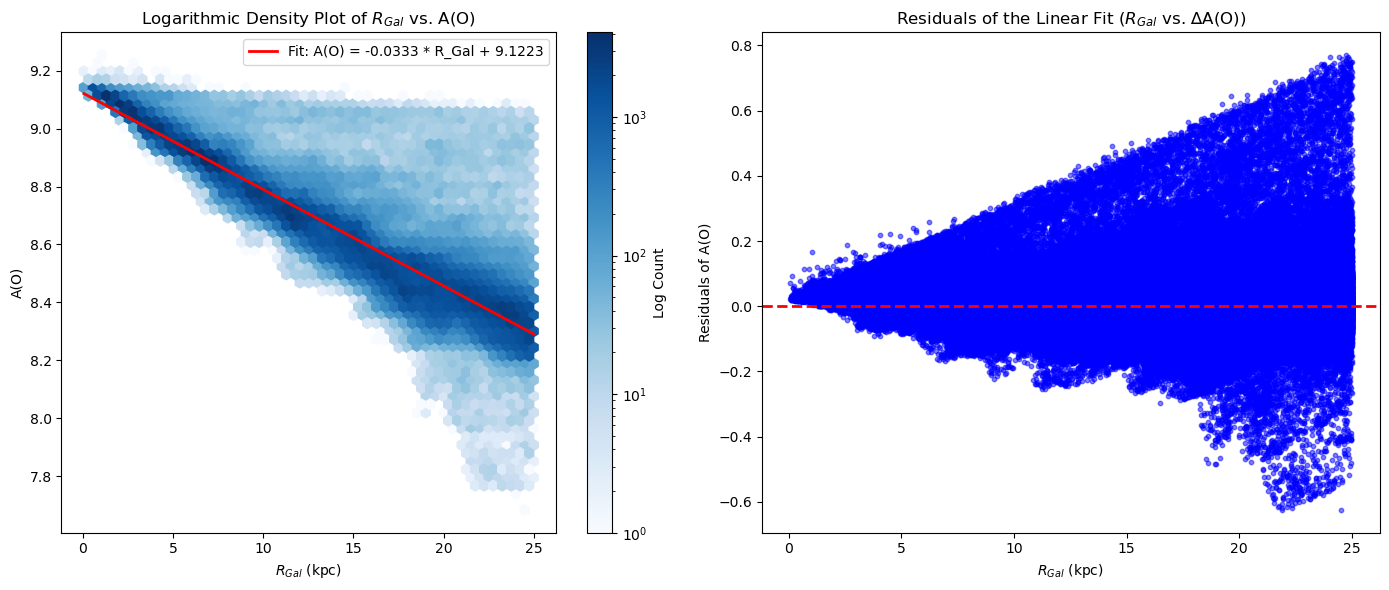

In [70]:
# Calculate the predicted A(O) values for plotting
A_O_pred = linear_fit(simulated_data_Rgal, a, b)

### Step 3: Plot the Fit and the Data ###

# Create a figure for the fit and residuals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

### Panel 1: Logarithmic Density Plot of R_Gal vs. A(O) with Linear Fit ###

# Plot a 2D histogram (logarithmic density plot) of R_Gal vs. A(O)
hb = ax1.hexbin(simulated_data_Rgal, metallicity, gridsize=50, cmap='Blues', bins='log')

# Plot the linear fit on top
ax1.plot(np.sort(simulated_data_Rgal), linear_fit(np.sort(simulated_data_Rgal), a, b), color='red', lw=2, label=f'Fit: A(O) = {a:.4f} * R_Gal + {b:.4f}')

# Add colorbar for density
cb = fig.colorbar(hb, ax=ax1)
cb.set_label('Log Count')

# Add labels, legend, and title
ax1.set_xlabel('$R_{Gal}$ (kpc)')
ax1.set_ylabel('A(O)')
ax1.set_title('Logarithmic Density Plot of $R_{Gal}$ vs. A(O)')
ax1.legend()

### Panel 2: Residuals of the Fit (R_Gal vs. Delta A(O)) ###

# Calculate the residuals
residuals = metallicity - A_O_pred

# Plot the residuals
ax2.scatter(simulated_data_Rgal, residuals, c='blue', s=10, alpha=0.5)

# Add a horizontal line at 0 to indicate no residuals
ax2.axhline(0, color='red', lw=2, linestyle='--')

# Add labels and title
ax2.set_xlabel('$R_{Gal}$ (kpc)')
ax2.set_ylabel('Residuals of A(O)')
ax2.set_title('Residuals of the Linear Fit ($R_{Gal}$ vs. ∆A(O))')

# Adjust layout and show the plot
plt.tight_layout()

# Save the figure as a PNG file with 200 DPI
plt.savefig('figures/Q3_2panel.png', dpi=200)

# Show the figure
plt.show()

* Discuss where the linear model fits well and where it does not. Use statistical metrics, such as the root mean squares or other goodness-of-fit indicators, to quantify the performance of your linear fit in general and regions with larger residuals.

The linear fit shows a negative trent between the radial distance $R_\text{Gal}$ and oxygen abundance A(O), however there are regions where the fit performs poorly, indicated by larger residuals. For low $R_\text{Gal}$ values ($R_\text{Gal} \le 10$ kpc), the linear model fits relatively well, with the residuals being closer to zero. This region shows smaller scatter in the residual plot, suggesting that a linear relationship may approximate the data well in this range. However, at high $R_\text{Gal}$ values ($R_\text{Gal} > 10$ kpc, and especially $R_\text{Gal} > 15$ kpc), the residuals become significantly larger, suggesting that the linear model is unable to capture the full coplexity of the relationship between $R_\text{Gal}$ and A(O) in this region. The large positive residuals imply the actual metallicity values were higher than what the linear model predicts.

To quantify how well the linear model fits the data, goodness-of-fit indicators, scuh as the root mean square error (RMSE), the coefficient of determination (R$^2$), and a region-specific analysis can be computed:

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

### Calculate RMSE and R² ###
# RMSE: Square root of the mean squared error
rmse = np.sqrt(mean_squared_error(metallicity, A_O_pred))

# R²: Coefficient of determination
r_squared = r2_score(metallicity, A_O_pred)

# Report the overall fit quality
print(f"Overall Fit Quality:")
print(f"Root Mean Square Error (RMSE) = {rmse:.4f}")
print(f"R² (Coefficient of Determination) = {r_squared:.4f}")

### Analyze Residuals in Different Regions ###

# Define regions (e.g., R_Gal <= 10 kpc and R_Gal > 10 kpc)
low_RGal_mask = simulated_data_Rgal <= 10
high_RGal_mask = simulated_data_Rgal > 10

# RMSE and R² for low R_Gal (<= 10 kpc)
rmse_low_RGal = np.sqrt(mean_squared_error(metallicity[low_RGal_mask], A_O_pred[low_RGal_mask]))
r_squared_low_RGal = r2_score(metallicity[low_RGal_mask], A_O_pred[low_RGal_mask])

# RMSE and R² for high R_Gal (> 10 kpc)
rmse_high_RGal = np.sqrt(mean_squared_error(metallicity[high_RGal_mask], A_O_pred[high_RGal_mask]))
r_squared_high_RGal = r2_score(metallicity[high_RGal_mask], A_O_pred[high_RGal_mask])

# Report the region-specific fit quality
print(f"\nFit Quality for R_Gal <= 10 kpc:")
print(f"RMSE = {rmse_low_RGal:.4f}")
print(f"R² = {r_squared_low_RGal:.4f}")

print(f"\nFit Quality for R_Gal > 10 kpc:")
print(f"RMSE = {rmse_high_RGal:.4f}")
print(f"R² = {r_squared_high_RGal:.4f}")

Overall Fit Quality:
Root Mean Square Error (RMSE) = 0.0876
R² (Coefficient of Determination) = 0.8729

Fit Quality for R_Gal <= 10 kpc:
RMSE = 0.0451
R² = 0.8220

Fit Quality for R_Gal > 10 kpc:
RMSE = 0.1007
R² = 0.6143


For the overall fit quality, the R$^2$ value is close to 1, indicating a good fit, however in low $R_\text{Gal}$ regions, the RMSE is lower and the R$^2$ is higher, meaning that the linear model fits much better in this region, whilst for high $R_\text{Gal}$ regions, the RMSW is much larger and R$^2$ is lower, indicating that the model performs poorly at larger radial distances. 

This supports the observation of larger residuals in the second panel of the plot, and it suggests that a more complex (possibly non-linear) model might be needed to capture the metallicity variation at these distances.

* Plot a 3-panel figure for the $x$ vs. $y$ plane using the same bins and sensible colourmaps:

> (a) 2D-histogram of the median simulated A(O).

> (b) 2D-histogram of the median fitted A(O).

> (c) 2D-histogram of the median residuals $\Delta$A(O)

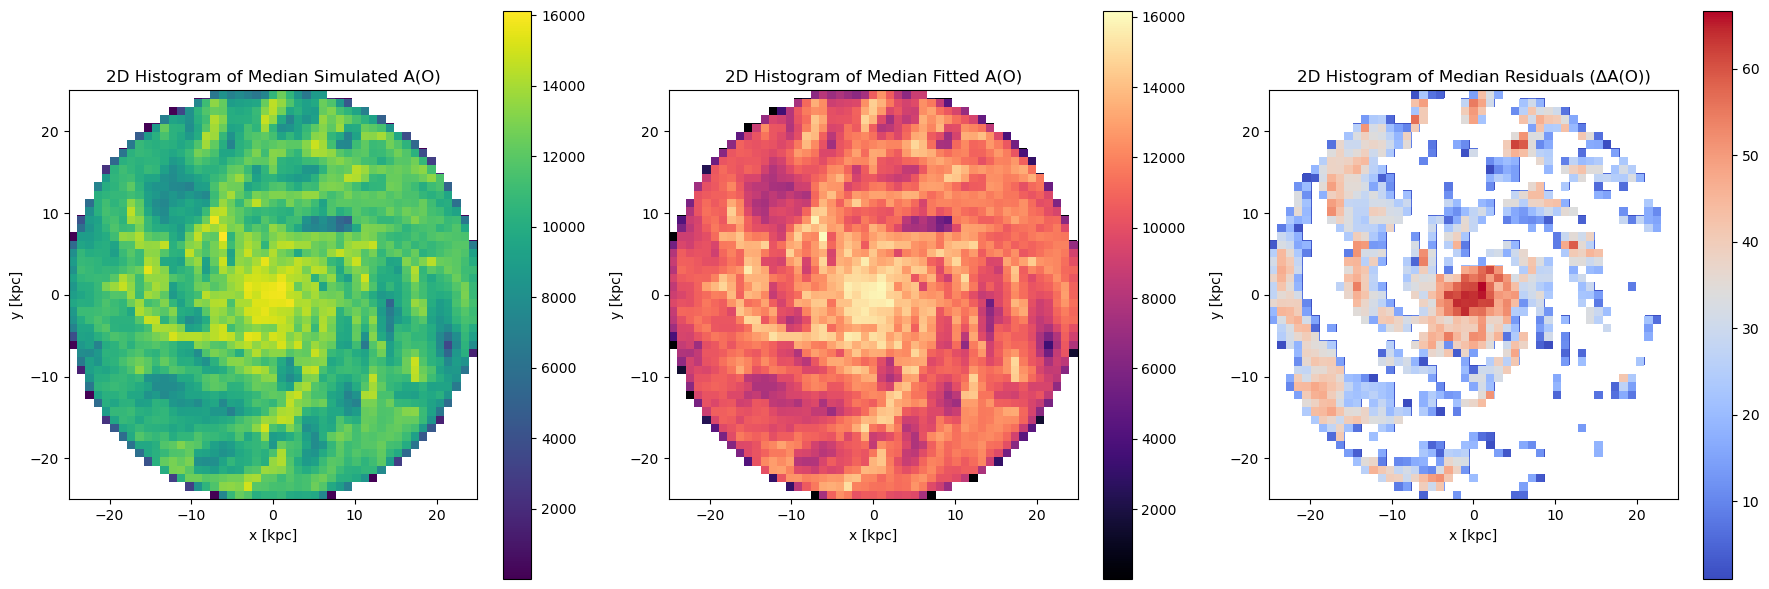

In [71]:
# Set up the binning for 2D histograms
bins = np.linspace(-25, 25, 50)  # 50 bins across the xy-plane
extent = [x.min(), x.max(), y.min(), y.max()]

# Create figure and axes for 3 panels
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

### Panel (a): 2D Histogram of Median Simulated A(O) ###
hist_simulated_AO, xedges, yedges, _ = axes[0].hist2d(
    x, y, bins=bins, weights=metallicity, cmap='viridis', norm=LogNorm(), cmin=1
)
axes[0].set_title('2D Histogram of Median Simulated A(O)')
axes[0].set_xlabel('x [kpc]')
axes[0].set_ylabel('y [kpc]')
fig.colorbar(axes[0].imshow(hist_simulated_AO.T, extent=extent, origin='lower', cmap='viridis'), ax=axes[0])

### Panel (b): 2D Histogram of Median Fitted A(O) ###
hist_fitted_AO, xedges, yedges, _ = axes[1].hist2d(
    x, y, bins=bins, weights=A_O_pred, cmap='magma', norm=LogNorm(), cmin=1
)
axes[1].set_title('2D Histogram of Median Fitted A(O)')
axes[1].set_xlabel('x [kpc]')
axes[1].set_ylabel('y [kpc]')
fig.colorbar(axes[1].imshow(hist_fitted_AO.T, extent=extent, origin='lower', cmap='magma'), ax=axes[1])

### Panel (c): 2D Histogram of Median Residuals (ΔA(O)) ###
hist_residuals, xedges, yedges, _ = axes[2].hist2d(
    x, y, bins=bins, weights=residuals, cmap='coolwarm', norm=LogNorm(), cmin=1
)
axes[2].set_title('2D Histogram of Median Residuals (ΔA(O))')
axes[2].set_xlabel('x [kpc]')
axes[2].set_ylabel('y [kpc]')
fig.colorbar(axes[2].imshow(hist_residuals.T, extent=extent, origin='lower', cmap='coolwarm'), ax=axes[2])

# Adjust layout and show the plot
plt.tight_layout()

# Save the figure as a PNG file with 200 DPI
plt.savefig('figures/Q3_3panel.png', dpi=200)

# Show the figure
plt.show()

* Describe your choice of 2D bins. Discuss what details would be missed with fewer bins or problems encountered with more bins.

The binning (70 bins) was chosen to balance spatial resolution with computational efficiency.The galaxy is simulated over a large spatial extent (around -25 kpc to 25 kpc), so using 50 bins across this range provides a resolution of about 1 kpc per bin. This resolution is fine enough to capture important details in the oxygen abundance distribution without overloading the plot with too many bins.

If few bins (e.g. 10 or 20 bins) were used, it would risk losing detailed spatial structure, such as localised pockets of high or low oxygen abundance. The plot would become too coarse, and fine variations in the metallicity would be averaged out.

If more bins (e.g. 100 or 200 bins) were used, it would give higher resolution but at the cost of introducing noise and potential undersampling within each bin, as fewer particles would be averaged per bin, leading to statistical fluctuations. This could make the plots harder to interpret.

* Analyse the residuals in more details and propose an explanation for any patterns you observe.

In Panel (a), the simulated median A(O), the simulated oxygen abundance appears to have distinct spatial patterns, with higher metallicities concentrated towards the centre of the galaxy. The spiral arm-like structures are visible, indicating that the oxygen abundance is not uniformly distributed but follows the galactic structure. This is consistent with the expectation that galactic centres are more metal-rich due to longer star formation histories and supernova enrichment.

In Panel (b), the fitted median A(O), the fitted oxygen abundance shows a much smoother distribution than the simulated data. The linear model captures the global radial gradient of oxygen abundance, but it lacks the finer details of the galactic structure, especially the spiral arms seen in the simulated data. This supports the earlier conclusion that the linear model is a simplification and does not fully account for the complexity of metallicity distribution, particularly the substructures like spiral arms.

In Panel (c), the residuals (A(O)), the residuals show that the linear model underestimates metallicity in the central regions, as evidence by the red regions (positive residuals). Conversely, the outer spiral arms tend to show negative residuals, indicating that the linear model overestimates the oxygen abundance in these regions. The pattern of residuals aligns with the idea that a linear radial gradient is insufficient to capture the non-linear variations in metallicity, especially in the spiral arms and galactic outskirts.